In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import time
import csv 
import re

In [2]:
dfem=pd.read_excel(r'data\employment2020timeseries.xlsx')

In [3]:
dfem.columns

Index(['Employment Region', 'State/Territory', 'Date',
       'Unemployment Rate (15+)  ', 'Participation Rate (15+)    ',
       'Employment Rate (15-64)   '],
      dtype='object')

In [4]:
dfem.isnull().sum()

Employment Region               0
State/Territory                 0
Date                            0
Unemployment Rate (15+)         0
Participation Rate (15+)        0
Employment Rate (15-64)         0
dtype: int64

In [5]:
dfem.head(5)

,Employment Region,State/Territory,Date,Unemployment Rate (15+),Participation Rate (15+),Employment Rate (15-64)
0,Adelaide North,SA,2005-08-01,6.6,60.6,68.3
1,Adelaide North,SA,2005-09-01,6.5,60.6,68.4
2,Adelaide North,SA,2005-10-01,6.3,60.7,68.7
3,Adelaide North,SA,2005-11-01,6.2,60.8,69.0
4,Adelaide North,SA,2005-12-01,6.1,60.9,69.2


In [6]:
dfem=dfem.drop('Employment Region',axis=1)

In [7]:
dfem=dfem.drop('Participation Rate (15+)    ',axis=1)

In [8]:
dfem

,State/Territory,Date,Unemployment Rate (15+),Employment Rate (15-64)
0,SA,2005-08-01,6.6,68.3
1,SA,2005-09-01,6.5,68.4
2,SA,2005-10-01,6.3,68.7
3,SA,2005-11-01,6.2,69.0
4,SA,2005-12-01,6.1,69.2
...,...,...,...,...
8140,QLD,2020-04-01,7.4,69.5
8141,QLD,2020-05-01,7.6,68.9
8142,QLD,2020-06-01,7.6,68.5
8143,QLD,2020-07-01,7.7,68.3


In [31]:
table=pd.pivot_table(dfem, values='Employment Rate (15-64)   ',index=['Date'],columns='State/Territory',aggfunc=np.mean)

In [21]:
table

State/Territory,NSW,NSW/ACT,NT,QLD,SA,TAS,VIC,WA
Date,,,,,,,,
2005-08-01,68.436316,74.7,76.2,72.55,70.436619,66.90,69.550000,73.300
2005-09-01,68.476110,74.8,76.0,72.72,70.515892,67.00,69.675000,73.750
2005-10-01,68.596219,74.7,75.7,72.77,70.519623,67.05,69.791667,74.050
2005-11-01,68.688432,74.6,75.5,72.88,70.524957,67.15,69.875000,74.325
2005-12-01,68.763041,74.7,75.3,72.98,70.529780,67.30,69.908333,74.575
...,...,...,...,...,...,...,...,...
2020-04-01,73.976012,78.8,78.3,73.55,72.533187,71.55,73.525000,76.475
2020-05-01,73.623417,78.7,78.3,73.21,72.216641,71.25,73.316667,75.950
2020-06-01,73.309891,78.7,78.3,72.99,72.122041,71.20,73.141667,75.625


In [32]:
table=table.rename(columns={'NSW/ACT':'ACT'})

In [33]:
table

State/Territory,NSW,ACT,NT,QLD,SA,TAS,VIC,WA
Date,,,,,,,,
2005-08-01,68.436316,74.7,76.2,72.55,70.436619,66.90,69.550000,73.300
2005-09-01,68.476110,74.8,76.0,72.72,70.515892,67.00,69.675000,73.750
2005-10-01,68.596219,74.7,75.7,72.77,70.519623,67.05,69.791667,74.050
2005-11-01,68.688432,74.6,75.5,72.88,70.524957,67.15,69.875000,74.325
2005-12-01,68.763041,74.7,75.3,72.98,70.529780,67.30,69.908333,74.575
...,...,...,...,...,...,...,...,...
2020-04-01,73.976012,78.8,78.3,73.55,72.533187,71.55,73.525000,76.475
2020-05-01,73.623417,78.7,78.3,73.21,72.216641,71.25,73.316667,75.950
2020-06-01,73.309891,78.7,78.3,72.99,72.122041,71.20,73.141667,75.625


In [34]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [37]:
table.index

DatetimeIndex(['2005-08-01', '2005-09-01', '2005-10-01', '2005-11-01',
               '2005-12-01', '2006-01-01', '2006-02-01', '2006-03-01',
               '2006-04-01', '2006-05-01',
               ...
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01'],
              dtype='datetime64[ns]', name='Date', length=181, freq=None)

In [38]:
matplotlib.rcParams['axes.labelsize'] = 23
matplotlib.rcParams['xtick.labelsize'] = 17
matplotlib.rcParams['ytick.labelsize'] = 17
matplotlib.rcParams['text.color'] = 'k'


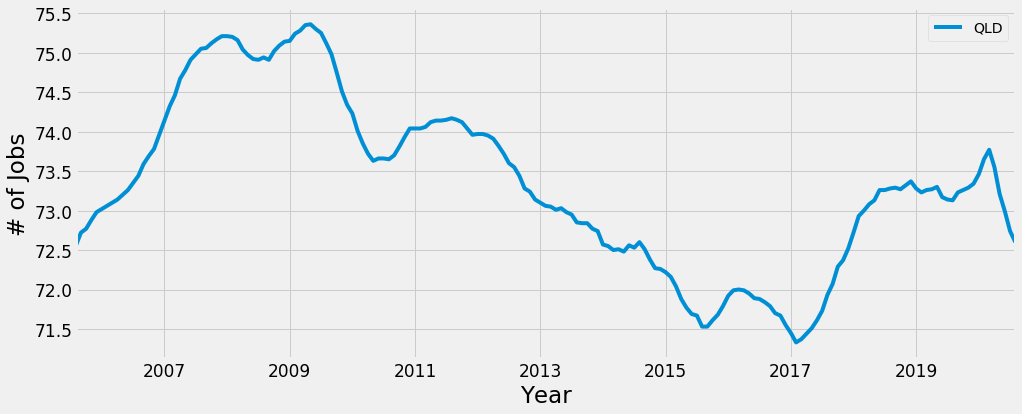

In [43]:
ax=table.plot(y='QLD',figsize=(15, 6))

ax.set_xlabel('Year')
ax.set_ylabel('# of Jobs')

plt.legend()
plt.show()

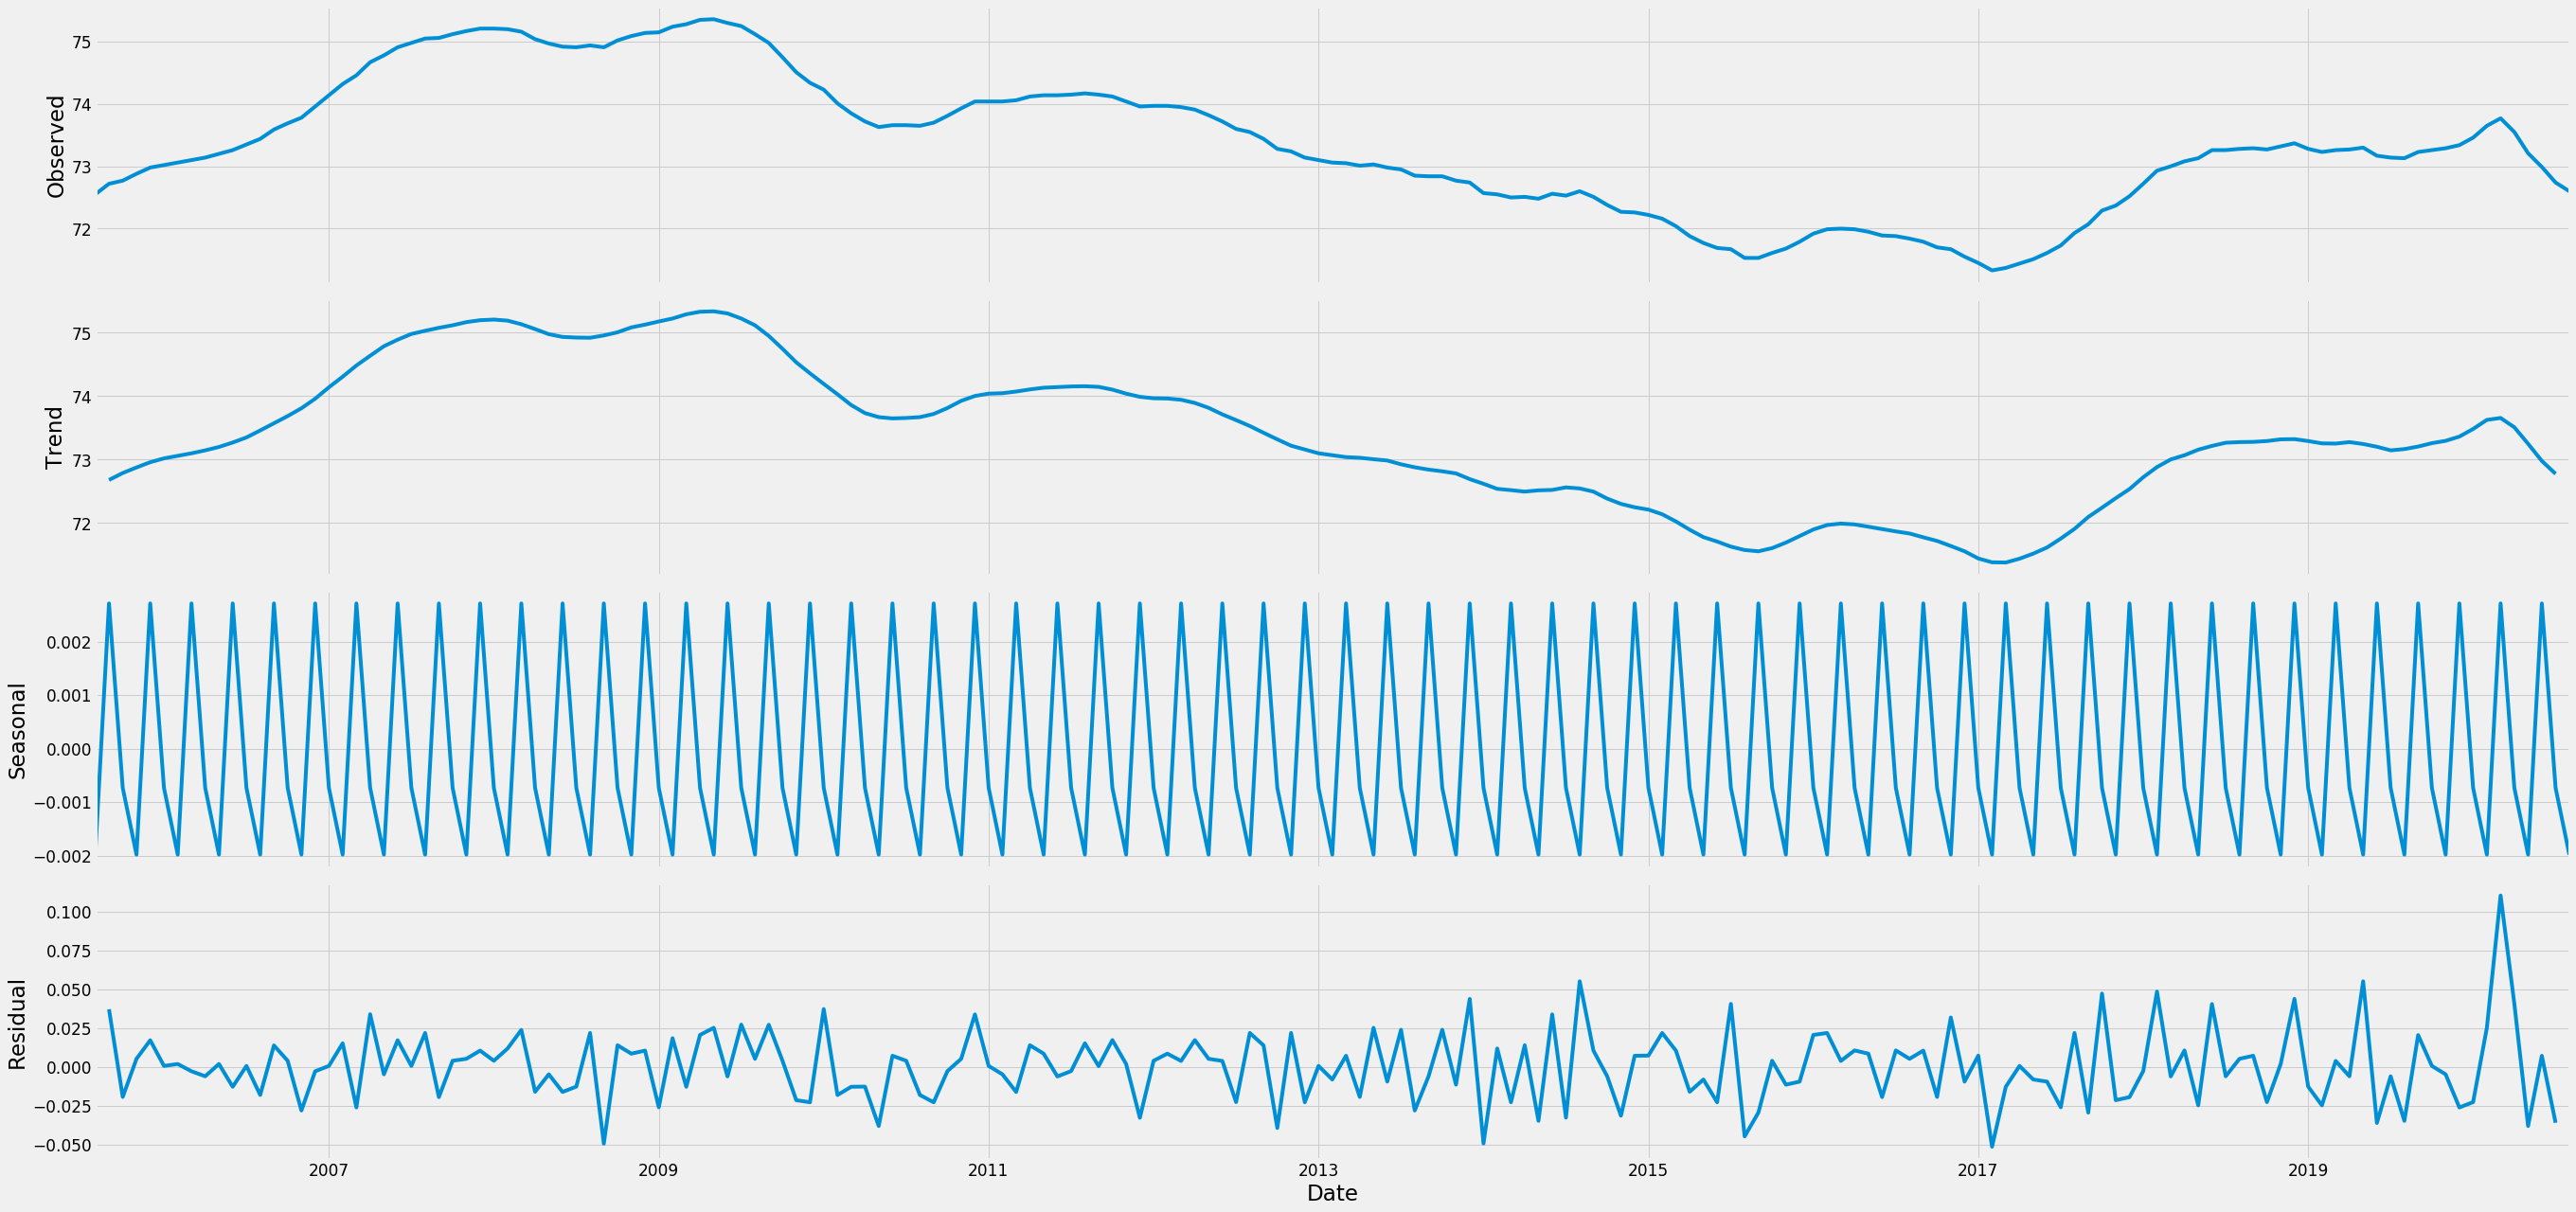

In [44]:
rcParams['figure.figsize'] = 38, 18
decomposition = sm.tsa.seasonal_decompose(table['QLD'], model='additive',freq=3)
fig = decomposition.plot()
plt.show()

In [45]:

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [49]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(table['QLD'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
    
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2059.1350256692767
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1924.922271479419
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:394.97614332164966
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:343.37485385583113
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:399.56538459803096
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:397.5977004967254
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:348.68512879129617
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:345.37411332585634
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2052.0640756228386
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1499.9261576823149
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:177.13397415301898
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:138.94888522098415
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:183.40130907096943
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:182.179345542531
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:152.16800528695762
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:141.0903699296303
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-314.0057899823314
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-295.50903262197

In [51]:
mod = sm.tsa.statespace.SARIMAX(table['QLD'],
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5282      0.066      7.964      0.000       0.398       0.658
ma.S.L12      -1.0001    278.692     -0.004      0.997    -547.227     545.227
sigma2         0.0069      1.920      0.004      0.997      -3.757       3.771


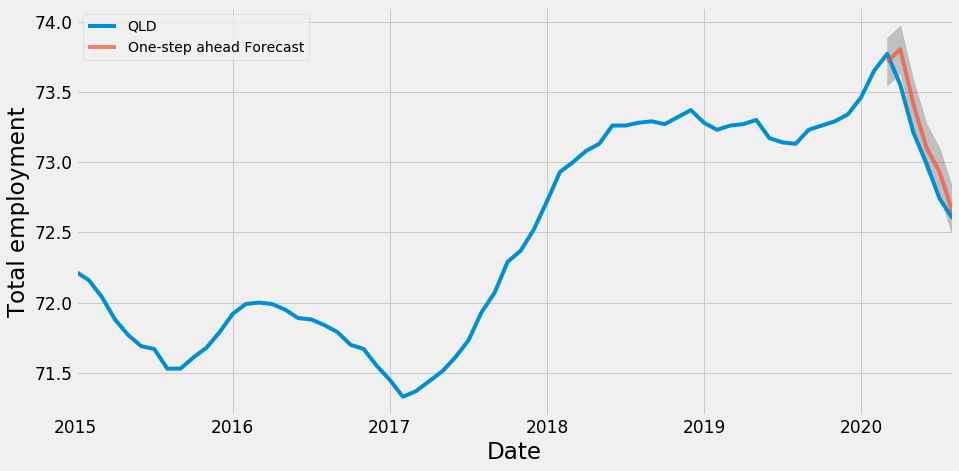

In [70]:
pred = results.get_prediction(start=pd.to_datetime('2020-03-01'),dynamic=False)
pred_ci = pred.conf_int()

ax = table.loc['2015':,['QLD']].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Total employment')

plt.legend()
plt.show()

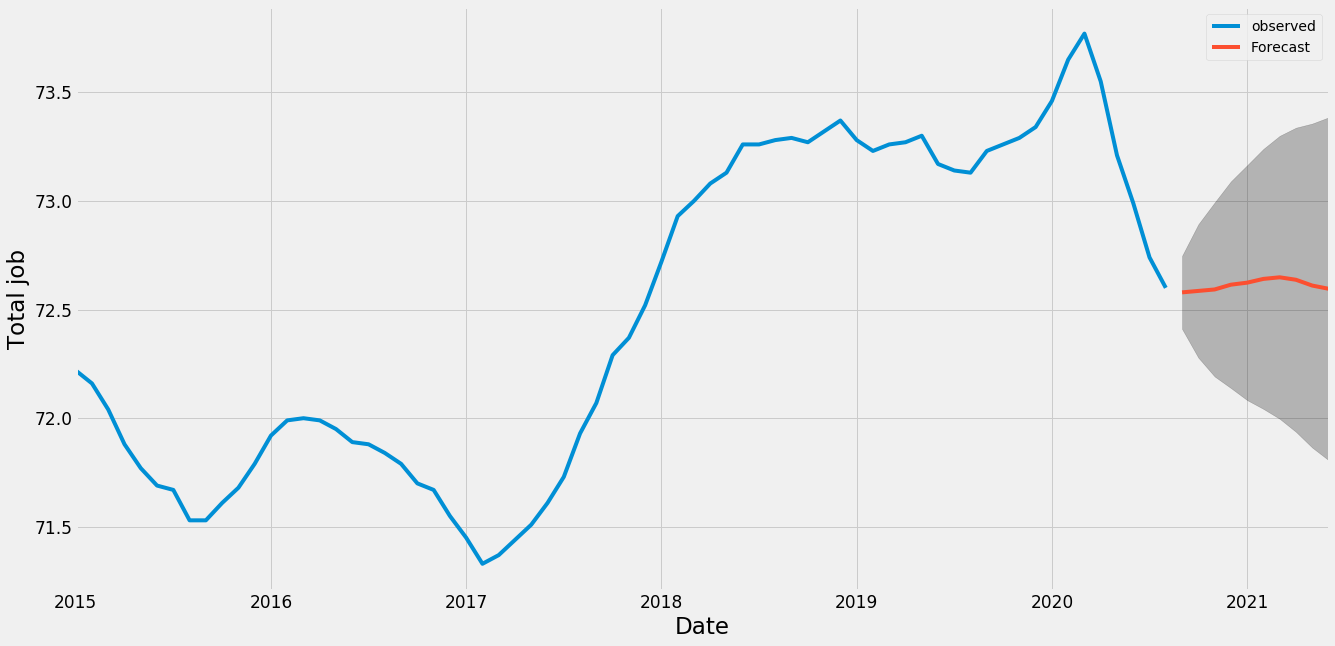

In [75]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()

ax = table.loc['2015':,'QLD'].plot(label='observed', figsize=(20, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Total job')
plt.legend()
plt.show()

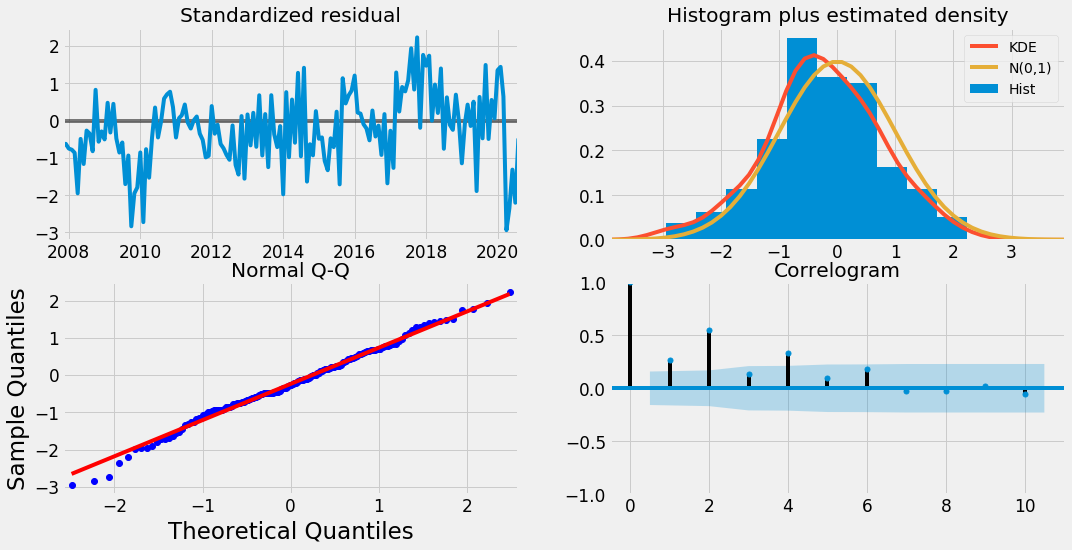

In [76]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()